# Метод Лагранжа

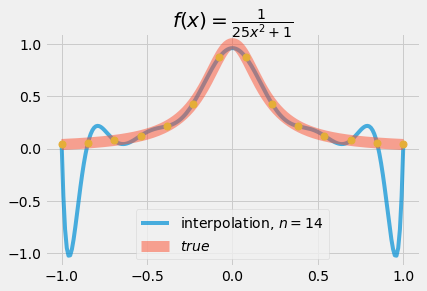

In [120]:
import numpy as np
import sympy

import matplotlib.pyplot as plt


def lagrange_k(xval, xk, k):
    n = len(xk)
    num, den = 1.0, 1.0 
    for j in range(n):
        if j == k: 
            continue
        den *= (xk[k] - xk[j])
        num *= (xval - xk[j])
    return num / den


def lagrange(xval, xk, yk):
    return sum(yk[k] * lagrange_k(xval, xk, k) for k in range(len(xk)))
    
def plot_(f, n, add_legend=True):
    xx = np.linspace(-1, 1, n)
    yy = f(xx)
    xn = np.linspace(-1, 1, 201)
    yn = [lagrange(_, xx, yy) for _ in xn]
    plt.plot(xn, yn, '-', alpha=0.7, label=r'interpolation, $n= %s$' % n)
    plt.plot(xn, f(xn), label=r'$true$',lw=11, alpha=0.5)
    plt.plot(xx, yy, 'o', ms=7)
    plt.title('$f(x) = %s $' % sympy.printing.latex(f(sympy.Symbol('x'))))
    if add_legend:
        plt.legend(loc='best')

plot_(lambda x: 1/(1 + 25*x**2), 14)
plt.show()

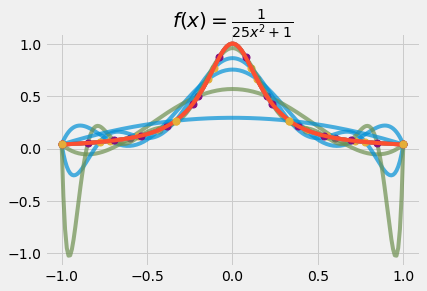

In [121]:
for n in [8, 6, 10, 14, 4]:
    plot_interp(lambda x: 1/(1 + 25*x**2), n, add_legend=False)
plt.show()

Интерполяция при n=4,6,8,10,14

# Полиномы Чебышёва

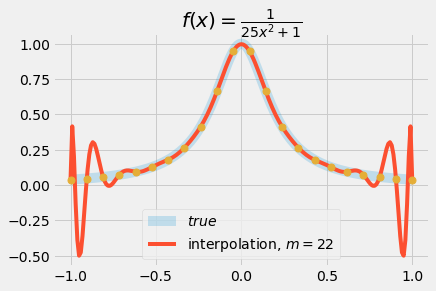

In [127]:
def cheb(f, m, add_legend=True):
    xx=np.linspace(-1,1,m)
    yy=f(xx)
    yn=np.polynomial.Chebyshev.fit(xn,yy,m)
    xn = np.linspace(-1, 1, 201)
    plt.plot(xn, f(xn), label=r'$true$',alpha=0.2,lw=10)
    plt.plot(xn, yn(xn), '-',  label=r'interpolation, $m= %s$' % m)
    plt.plot(xx, yy, 'o', ms=7)
    plt.title('$f(x) = %s $' % sympy.printing.latex(f(sympy.Symbol('x'))))
    if add_legend:
        plt.legend(loc='best')
cheb(lambda x: 1/(1 + 25*x**2), 22)
plt.show()

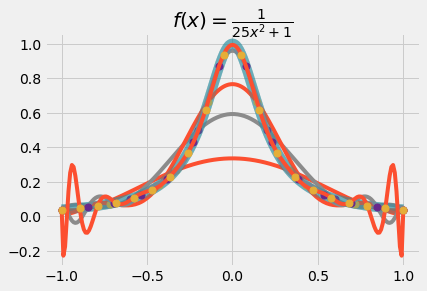

In [126]:
for m in [4, 6, 8, 14, 20]:
    cheb(lambda x: 1/(1 + 25*x**2), m, add_legend=False)
plt.show()

 Интерполяция многочленами Чебышева при m=8, 6, 14, 20, 4 (cиним обозначена реальная функция f(x))

# Вывод

При больших n в методе Лагранжа и больших m в полиномах Чебышева появляются большие отклонения на краях. Возможное решение проблемы - использовать не глобальную интерполяцию, а сплайны 